In [43]:
# 矢量计算表达式

import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)

start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)


start = time()
d = a + b
print(time() - start)

0.012468338012695312
6.4849853515625e-05


In [44]:
a = torch.ones(3)
b = 10
print(a + b)



tensor([11., 11., 11.])


In [207]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size())) # 添加噪声
print(features[0], labels[0])

tensor([ 0.3170, -1.8912], dtype=torch.float64) tensor(11.2467, dtype=torch.float64)


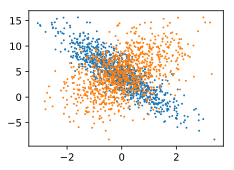

In [46]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)

In [47]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)



In [48]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.4648,  1.6626],
        [-0.9396,  0.2654],
        [ 0.3484,  1.0673],
        [ 0.0194,  1.2499],
        [ 0.4752,  0.2865],
        [ 0.2165, -0.9161],
        [ 0.2311,  0.2560],
        [-0.5643, -2.2024],
        [ 0.4257,  0.2244],
        [-0.4710,  3.3934]], dtype=torch.float64) tensor([-2.3853,  1.4120,  1.2712, -0.0175,  4.1748,  7.7442,  3.7914, 10.5623,
         4.2914, -8.2994], dtype=torch.float64)


### 初始化模型

In [116]:
# 初始化权重为均值为0，标准差为0.01的正太随机数，偏差初始化为0
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float64)
b = torch.zeros(1, dtype=torch.float64)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)
print(np.random.normal(0, 0.01, (num_inputs, 1)))
print(w)

[[0.00593886]
 [0.02190623]]
tensor([[0.0076],
        [0.0192]], dtype=torch.float64, requires_grad=True)


In [117]:
# 定义模型
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [118]:
# 定义损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [119]:
# 定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [120]:
# 训练模型
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.024024
epoch 2, loss 0.000079
epoch 3, loss 0.000048
epoch 4, loss 0.000047
epoch 5, loss 0.000047


In [126]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9998],
        [-3.3998]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.2009], dtype=torch.float64, requires_grad=True)


In [210]:
# 线性回归简洁实现
torch.manual_seed(1)

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

import torch.utils.data as Data
batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

for X, y in data_iter:
    print(X, y)
    break

1.1.0.post2
tensor([[-0.7075, -1.0362],
        [-1.7999,  0.2416],
        [ 0.0779, -0.0554],
        [ 1.6233,  0.4621],
        [-0.6167, -0.1330],
        [-0.7362, -0.9364],
        [ 0.3578, -1.2782],
        [-1.3747, -0.1908],
        [-0.1787,  0.5775],
        [ 0.1574,  1.6021]]) tensor([ 6.2860, -0.2195,  4.5541,  5.8731,  3.4346,  5.9144,  9.2724,  2.1012,
         1.8777, -0.9294])


In [211]:
# 定义模型
from torch import nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        
    def forward(self, x):
        y = self.linear(x)

net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [212]:
# 事实上，我们还可以用nn.Sequential来更方便得搭建网络。Sequential是一个有序的容器，网络层按照在传入Sequential的顺序一次被添加到计算图中
# 写法一
net1 = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
)
# 写法二
net2 = nn.Sequential()
net2.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module...
# 写法三
from collections import OrderedDict
net = nn.Sequential(
    OrderedDict([
        ('linear', nn.Linear(num_inputs, 1)),
        # ...
    ])
)
print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [213]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.5347, 0.7057]], requires_grad=True)
Parameter containing:
tensor([0.6873], requires_grad=True)


In [214]:
# 初始化模型参数
from torch.nn import init
init.normal_(net[0].weight, mean=0.0, std=0.01)
init.constant_(net[0].bias, val=0.0)

Parameter containing:
tensor([0.], requires_grad=True)

In [215]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0142, -0.0161]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [216]:
loss = nn.MSELoss()

In [217]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [218]:
# 训练模型
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000401
epoch 2, loss: 0.000101
epoch 3, loss: 0.000067
